# Nama  : Iqsai Indra Nuugraha
# Nim   : 191351041
# Kelas : If Pagi B

# Import library yang digunakan

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle
import os

# Data discovery

In [74]:
data = pd.read_csv('CC GENERAL.csv')

# Menampilkan informasi dasar dataset

In [75]:
print("Info dataset:")
print(data.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64

# Menampilkan 5 baris pertama dataset

In [76]:
print("Baris Pertama Dataset:")
print(data.head())

Baris Pertama Dataset:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1            

# Statistik deskriptif dataset

In [77]:
print("Statistik Deskriptif:")
print(data.describe())

Statistik Deskriptif:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

# Menampilkan jumlah nilai null per kolom

In [78]:
print("Jumlah Nilai Null per Kolom:")
print(data.isnull().sum())

Jumlah Nilai Null per Kolom:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


# EDA 1: Distribusi Variabel

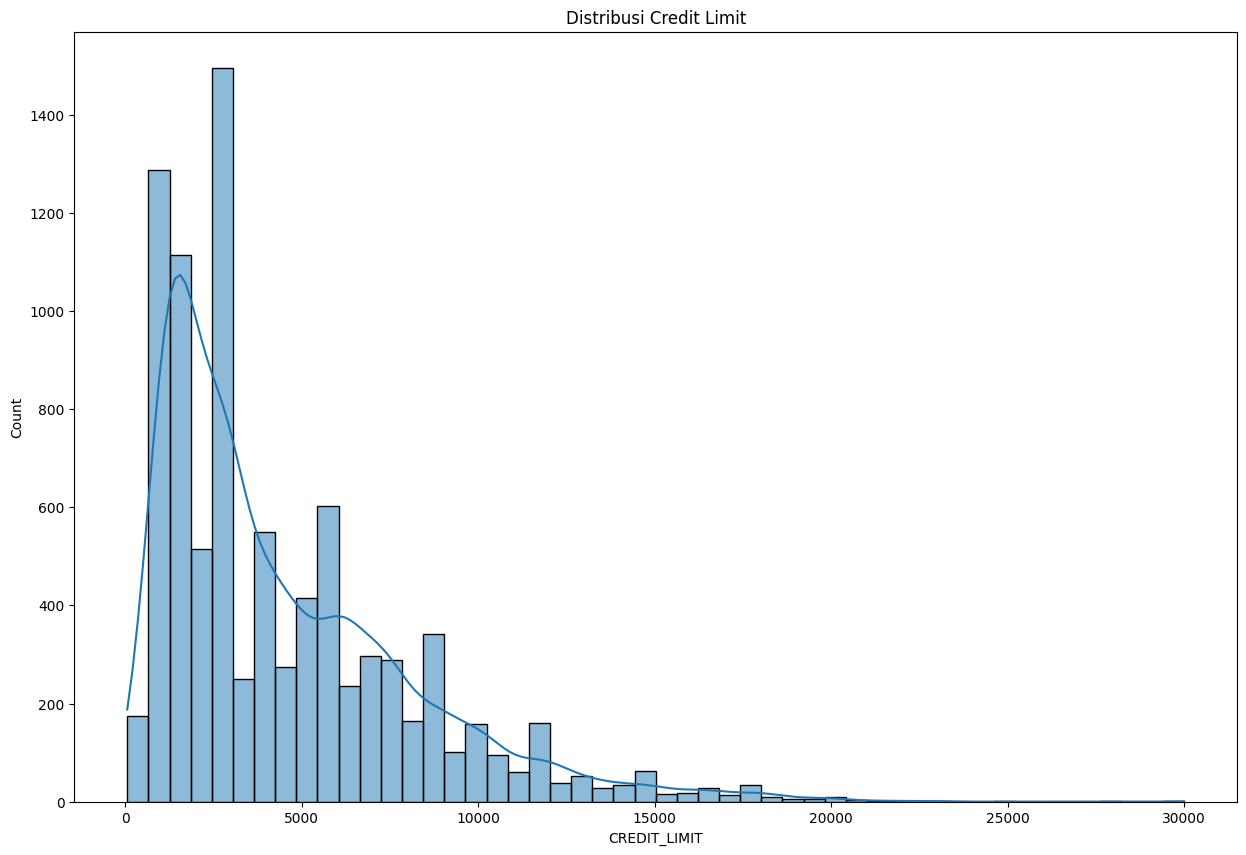

In [79]:
plt.figure(figsize=(15, 10))
sns.histplot(data['CREDIT_LIMIT'], bins=50, kde=True)
plt.title('Distribusi Credit Limit')
plt.show()

# EDA 2: Korelasi antar Variabel

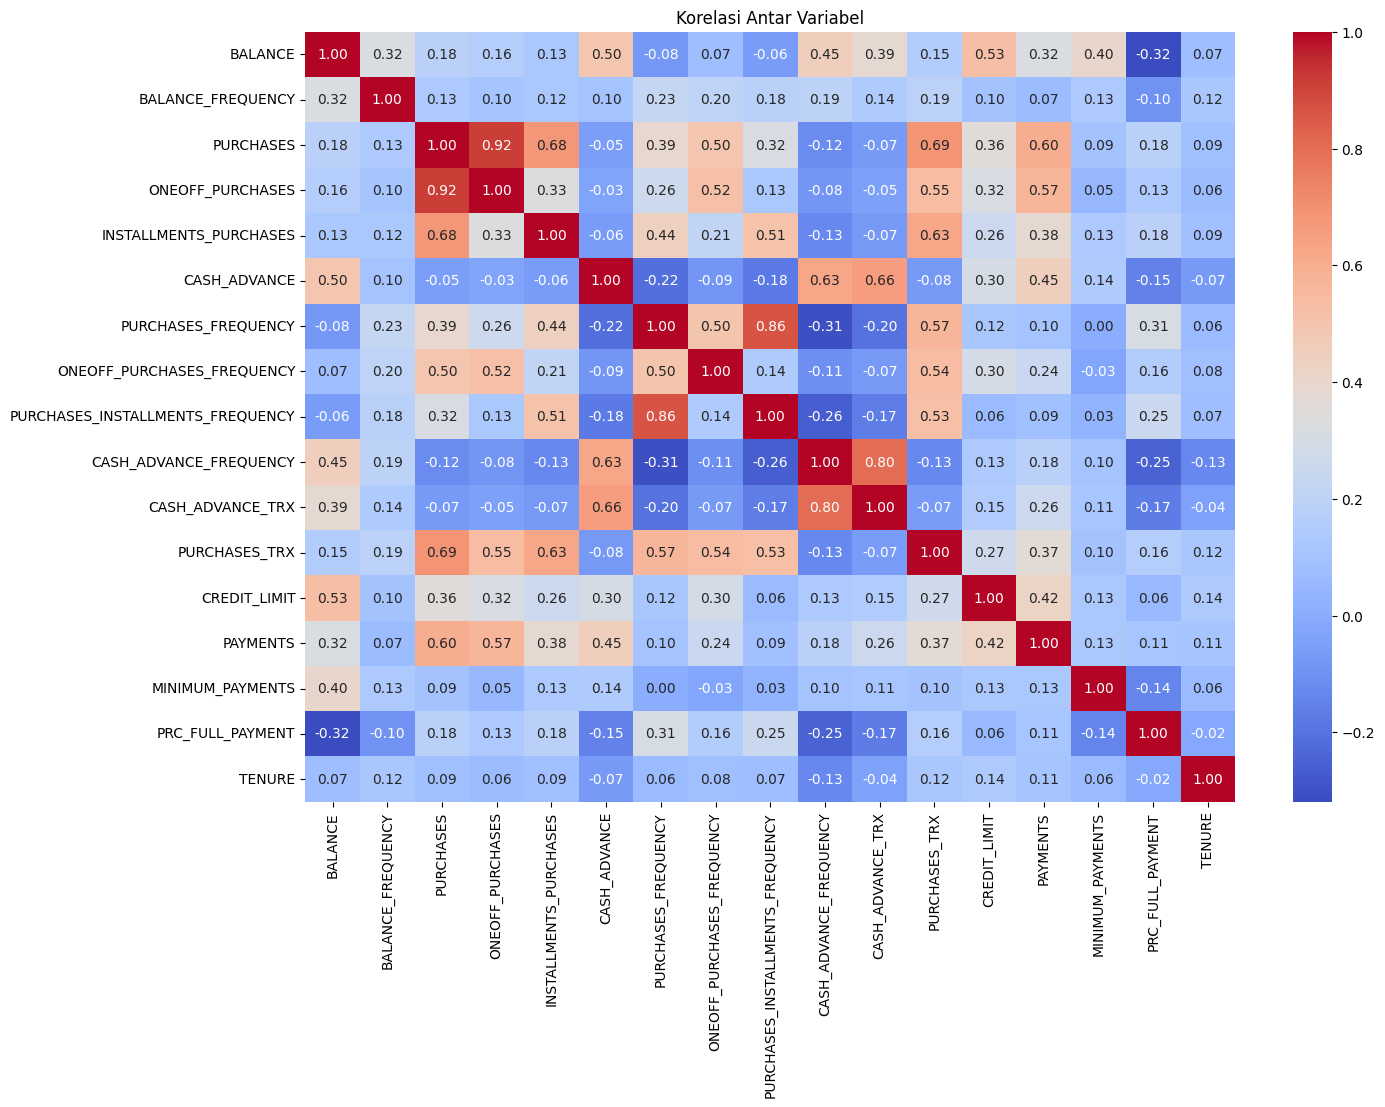

In [80]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.drop('CUST_ID', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel')
plt.show()


# EDA 3: Pairplot untuk melihat hubungan variabel

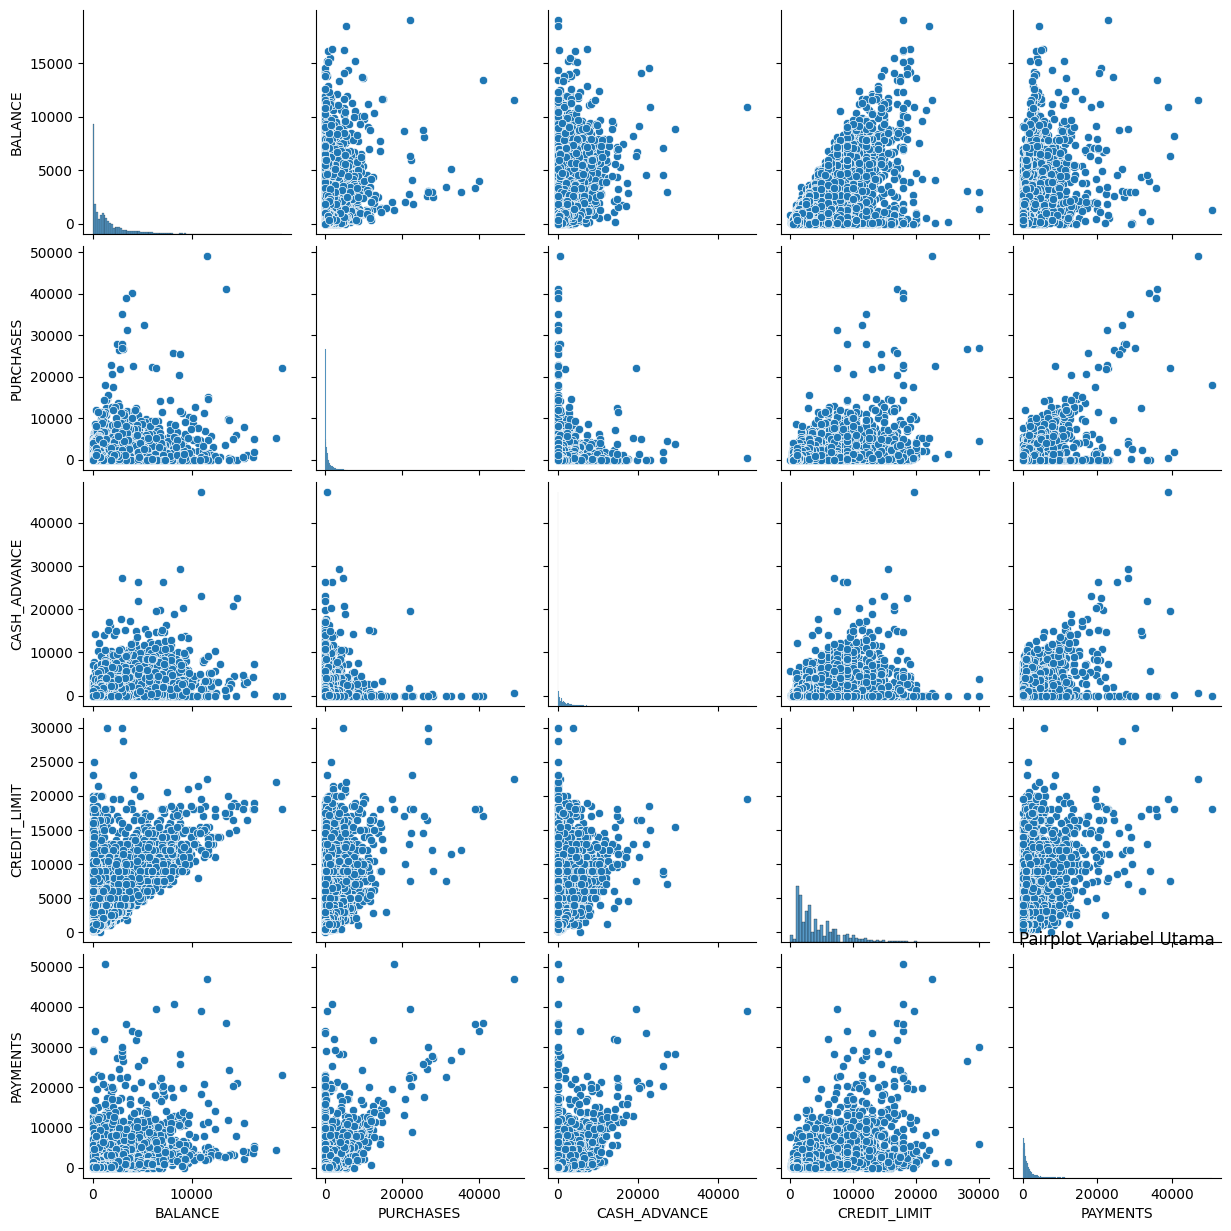

In [81]:
sns.pairplot(data[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']])
plt.title('Pairplot Variabel Utama')
plt.show()

# EDA 4: Boxplot untuk melihat outliers

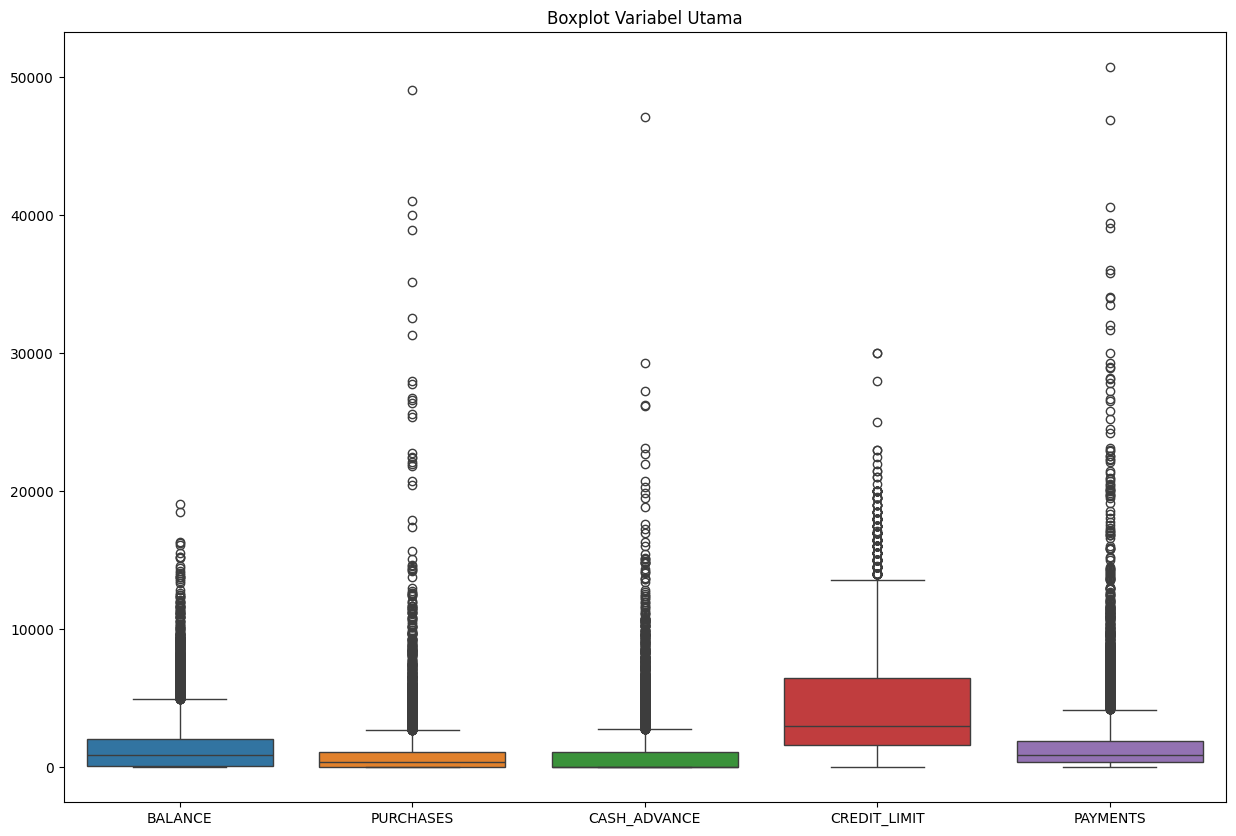

In [82]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']])
plt.title('Boxplot Variabel Utama')
plt.show()

# EDA 5: Distribusi kategori pada variabel tertentu

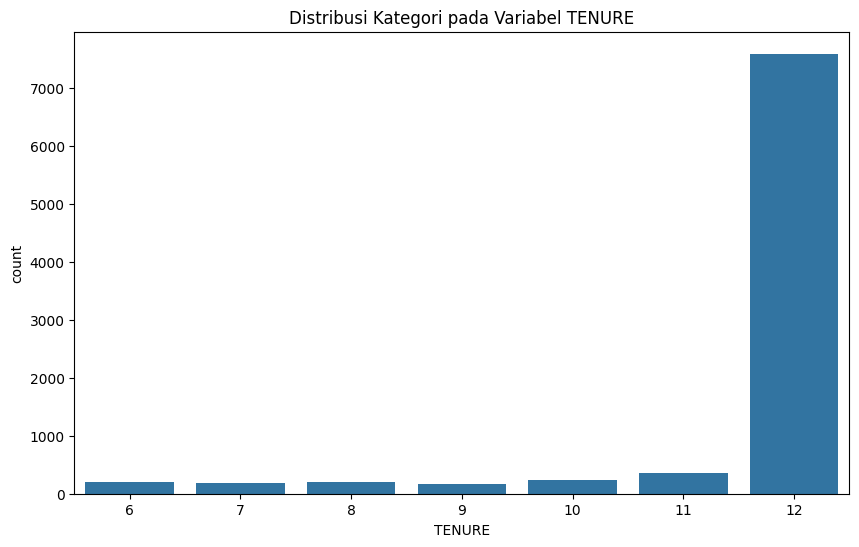

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', data=data)
plt.title('Distribusi Kategori pada Variabel TENURE')
plt.show()

# 4. Preprocessing
# Mengisi nilai null dengan nilai median

In [84]:
data_numeric = data.drop('CUST_ID', axis=1)

data_numeric.fillna(data_numeric.median(), inplace=True)

data = pd.concat([data['CUST_ID'], data_numeric], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)


# Standarisasi data

In [85]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(['CUST_ID'], axis=1))

# 5. Modeling (K-Means)

In [86]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# 6. Visualisasi hasil algoritma

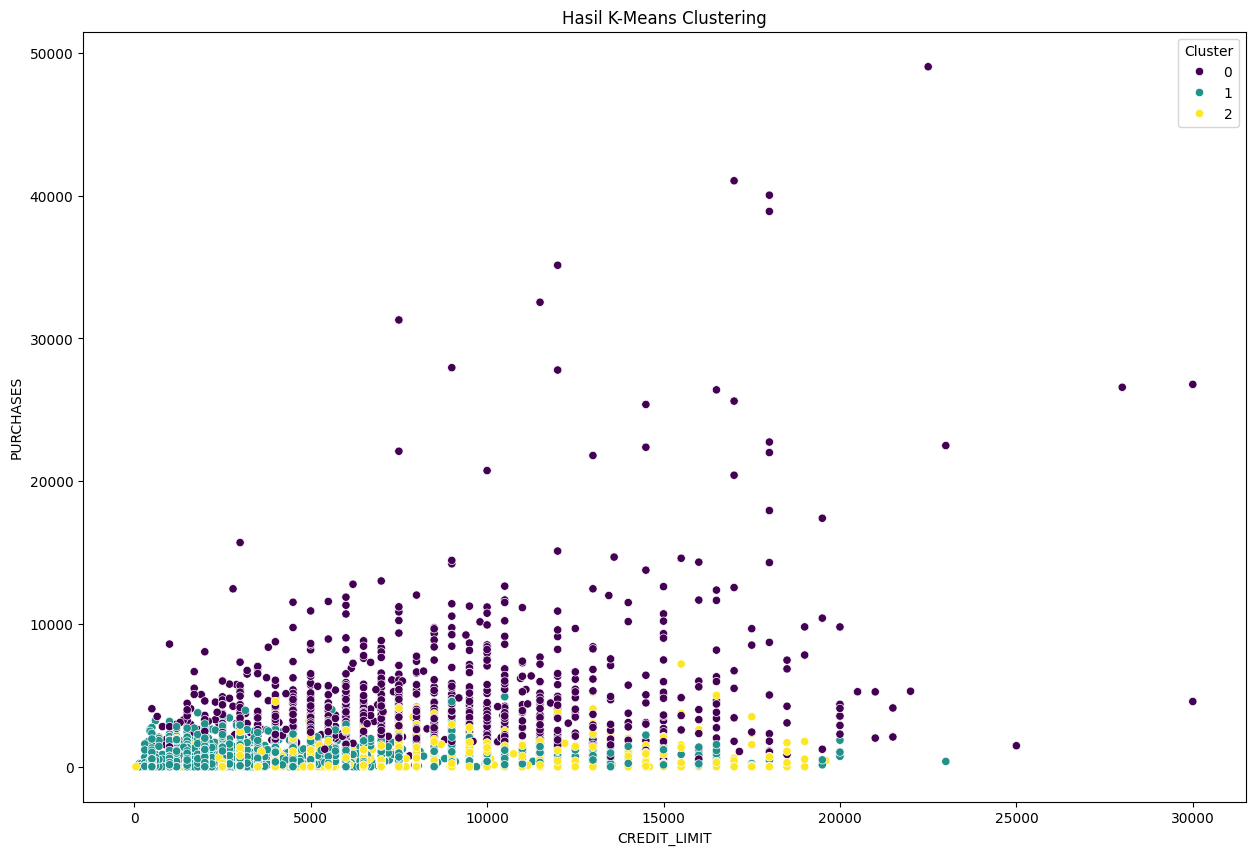

In [87]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue='Cluster', data=data, palette='viridis')
plt.title('Hasil K-Means Clustering')
plt.show()

In [88]:
model_path = '/content/drive/MyDrive/UAS_ML1_K-MEANS/'

In [89]:
if not os.path.exists(model_path):
    os.makedirs(model_path)

# 7. Save model (Pickle)

In [90]:
# Menyimpan model
with open(os.path.join(model_path, 'kmeans_model.pkl'), 'wb') as model_file:
    pickle.dump(kmeans, model_file)